# Logistik Regression

---



In [109]:
#Mengkoneksikan Colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**1. Import library**

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

**2. Membaca data file CSV**

In [111]:
PATH = "/content/gdrive/MyDrive/Project_Machine_Learning/Praktikum_Mandiri_4/Data/"

df = pd.read_csv(PATH + "calonpembelimobil.csv", sep=",")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


**3. Melihat informasi umum dataset**

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


**4. Data pre-processing**

In [113]:
# Cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [114]:
# Cek duplikat data
df.duplicated().sum()

np.int64(0)

In [115]:
# Menghapus data duplikat (apabila ada)
# df.drop_duplicates(inplace=True)

In [116]:
# Cek nilai unik
df["Kelamin"].unique()
# Jenis kelamin calon pembeli (0=pria, 1=wanita)

array([0, 1])

In [117]:
df["Status"].unique()
# Status pernikahan calon pembeli (0=single, 1=menikah, 2=menikah mempunyai anak, 3=duda/janda)

array([1, 2, 3, 0])

In [118]:
df["Beli_Mobil"].unique()
# Apakah calon pembeli mobil benar benar membeli mobil atau tidak (0=tidak membeli, 1=membeli mobil)

array([1, 0])

In [119]:
#Mapping kolom kategori kebentuk numerik (Karena semua kolom sudah numerik, tidak perlu mengubahnya lagi)

#Melihat distribusi (jumlah kemunculan) dari masing-masing kategori atau kelas disemua kolom
for col in df.columns:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts())


Distribusi ID:
ID
1000    1
1       1
2       1
3       1
4       1
       ..
13      1
12      1
11      1
10      1
9       1
Name: count, Length: 1000, dtype: int64

Distribusi Usia:
Usia
43     32
26     31
31     31
38     31
30     30
51     30
28     30
32     29
35     29
55     28
52     27
49     27
34     27
37     27
29     26
45     26
40     25
44     25
25     24
39     24
59     24
53     24
48     24
27     22
54     22
64     22
42     22
36     22
33     21
61     21
46     21
41     21
62     20
56     19
50     18
60     18
57     17
47     17
24     16
65     16
58     16
63     16
131     1
164     1
Name: count, dtype: int64

Distribusi Status:
Status
2    287
1    262
0    240
3    211
Name: count, dtype: int64

Distribusi Kelamin:
Kelamin
0    519
1    481
Name: count, dtype: int64

Distribusi Memiliki_Mobil:
Memiliki_Mobil
1    379
0    338
2    277
3      5
4      1
Name: count, dtype: int64

Distribusi Penghasilan:
Penghasilan
172    16
200    15
190    14

In [120]:
# Analisis korelasi antar variabel numerik
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


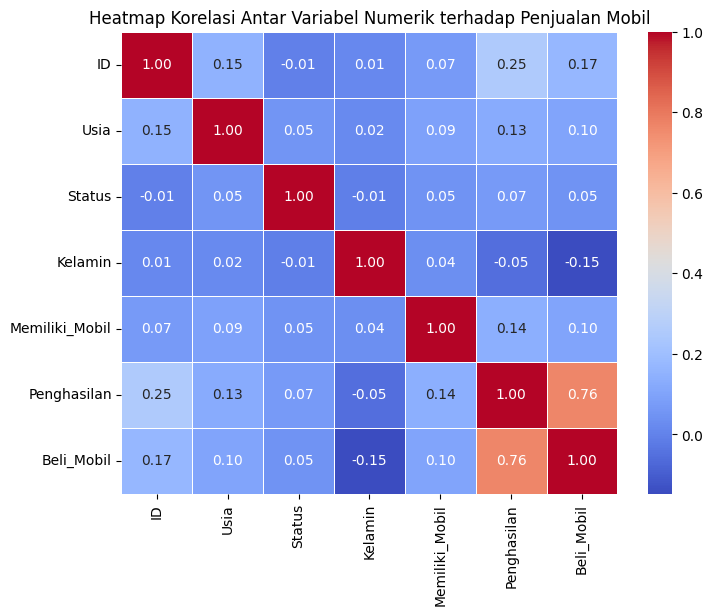

In [121]:
# Visualisasi heatmap korelasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik terhadap Penjualan Mobil", fontsize=12)
plt.show()

**5. Pembagian dataset (Training dan Testing)**

In [122]:
# Menentukan fitur dan target

# Fitur numerik dan gender
feature_num = ["Usia", "Penghasilan"]
feature_bin = ["Status", "Kelamin", "Memiliki_Mobil"]

# Gabungkan & drop missing
use_cols = feature_num + feature_bin + ["Beli_Mobil"]
df_model = df[use_cols].dropna().copy()

x = df_model[feature_num + feature_bin]
y = df_model["Beli_Mobil"]

print("X shape:", x.shape)
print("Y shape:", y.shape)

X shape: (1000, 5)
Y shape: (1000,)


In [123]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 5)
Data uji: (200, 5)


**6. Pembangunan model logistic regression**

In [124]:
# Scale hanya fitur numerik, gender langsung passthrough
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42,
    C=0.5   # default = 1.0, lebih kecil = regularisasi lebih kuat
)

clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("Model logistic regression berhasil dilatih")

Model logistic regression berhasil dilatih


**7. Prediksi model dan evaluasi model**

In [125]:
# Prediksi & Probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung Metrik
print(f"Akurasi   : {accuracy_score(y_test, y_pred):4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi   : 0.930000
Precision : 0.9829
Recall    : 0.9055
F1-Score  : 0.9426
ROC AUC   : 0.9768


**8. Visualisasi hasil evaluasi**

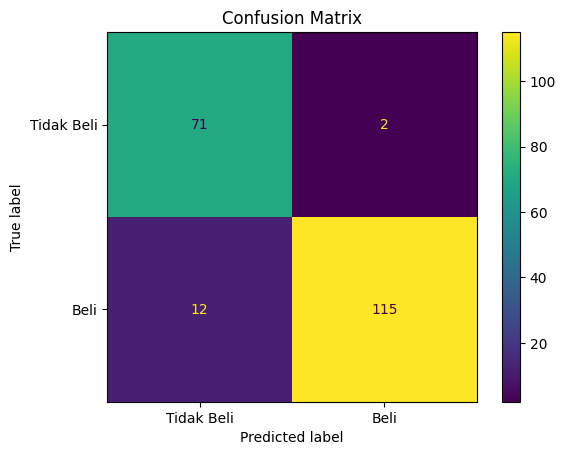

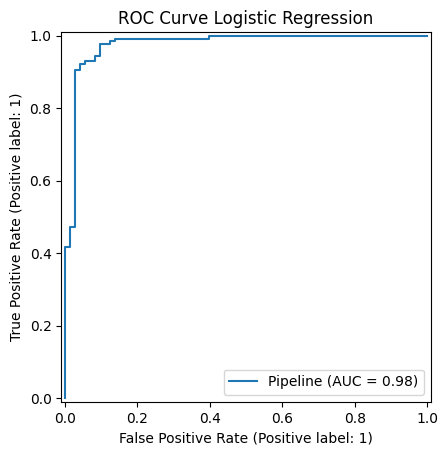

In [126]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=["Tidak Beli", "Beli"]
                       ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

**9. Classification report**

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak beli (0)', 'Beli(1)']))

                precision    recall  f1-score   support

Tidak beli (0)       0.86      0.97      0.91        73
       Beli(1)       0.98      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.94      0.93      0.93       200



In [128]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, x, y, cv=5)

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.765 0.935 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.908
Standar deviasi: 0.07180529228406494


**10. Interpretasi model logistic regression**

In [129]:
# Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-oods)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-oods),Odds Ratio (e^coef)
1,Penghasilan,4.119396,61.522081
4,Memiliki_Mobil,0.089477,1.093602
0,Usia,-0.026350,0.973994
2,Status,-0.104608,0.900677
3,Kelamin,-1.008046,0.364931


**11. Prediksi data baru (Contoh kasus)**

In [136]:
# 4 calon pembeli mobil
data_baru = pd.DataFrame({
    "Usia": [28, 20, 22, 33],
    "Penghasilan": [7000000, 150000, 3500000, 8500000],
    "Status": [1, 0, 0, 1],         # 1 = Menikah, 0 = Lajang
    "Kelamin": [1, 0, 1, 0],        # 1 = Laki-laki, 0 = Perempuan
    "Memiliki_Mobil": [0, 1, 0, 0]  # 1 = Sudah punya mobil, 0 = Belum
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil["Prob_Beli_Mobil"] = prob
hasil["Pred (0=Tidak,1=Ya)"] = pred

hasil["Keterangan"] = hasil["Pred (0=Tidak,1=Ya)"].map({0: "Tidak Membeli", 1: "Akan Membeli"})

display(hasil)

,Usia,Penghasilan,Status,Kelamin,Memiliki_Mobil,Prob_Beli_Mobil,"Pred (0=Tidak,1=Ya)",Keterangan
0,28,7000000,1,1,0,1.0,1,Akan Membeli
1,20,150000,0,0,1,1.0,1,Akan Membeli
2,22,3500000,0,1,0,1.0,1,Akan Membeli
3,33,8500000,1,0,0,1.0,1,Akan Membeli
